# Assignment C
In this section, you will perform tasks for the "housing_sales" dataset. The dataset can be downloaded from Moodle. Please load the "housing_sales.csv" data file into your Python environment as a dataframe named "housing_sales"

The dataset is a real-world dataset that contains information on housing prices in Texas (USA), which were recorded for multiple years (monthly frequency). You are supposed to analyze the data, gain insights and answer the following question:

In [1296]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Question 1
How many data observations / samples does the dataset have?

In [1297]:
housing_sales = pd.read_csv("housing_sales.csv",sep=",")
print(housing_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8602 entries, 0 to 8601
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       8602 non-null   object 
 1   year       8602 non-null   int64  
 2   month      8602 non-null   int64  
 3   sales      8034 non-null   float64
 4   volume     8034 non-null   float64
 5   median     7986 non-null   float64
 6   listings   7178 non-null   float64
 7   inventory  7135 non-null   float64
 8   date       8602 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 605.0+ KB
None


## Question 2
There are some missing values in the housing_sales data. Remove all rows that contain one or more missing value from the dataset.

How many observations / samples does the dataset housing_sales now have?

In [1298]:
print(f"Number of missing values initially:\n{housing_sales.isnull().sum()}")
housing_sales.dropna(inplace=True,ignore_index=True)
print(f"\nNumber of missing values after dropping:\n{housing_sales.isnull().sum()}")
print(housing_sales.info())

Number of missing values initially:
city            0
year            0
month           0
sales         568
volume        568
median        616
listings     1424
inventory    1467
date            0
dtype: int64

Number of missing values after dropping:
city         0
year         0
month        0
sales        0
volume       0
median       0
listings     0
inventory    0
date         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7126 entries, 0 to 7125
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       7126 non-null   object 
 1   year       7126 non-null   int64  
 2   month      7126 non-null   int64  
 3   sales      7126 non-null   float64
 4   volume     7126 non-null   float64
 5   median     7126 non-null   float64
 6   listings   7126 non-null   float64
 7   inventory  7126 non-null   float64
 8   date       7126 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage:

## Question 3
What is the latest year (= last year) for which housing prices were recorded?

In [1299]:
print(housing_sales["year"].max())

2015


## Question 4
What is the average number of months it would take to sell the current inventory of houses for which housing prices were recorded?

 

Remark 1: Use the variable "inventory" (= "amount of time (months) it would take to sell all current listings at current pace of sales") contained in the data. Ensure that you had previously removed all rows with missing values before conducting this calculation (one of the initial questions).

Remark 2: Provide your answer rounded to the closest integer.

In [1300]:
avg_months = housing_sales["inventory"].mean()
print(f"Average: {avg_months}, rounded to nearest integer: {round(avg_months)}")

Average: 7.174417625596408, rounded to nearest integer: 7


## Question 5
What is the smallest number of listings for which housing prices were recorded?

 

Remark 1: Use the variable "listings" contained in the data. Ensure that you had previously removed all rows with missing values before conducting this calculation (one of the initial questions).

Remark 2: Provide your answer rounded to the closest integer.

In [1301]:
print(housing_sales["listings"].min())

# check if the observation is valid:
mask1 = housing_sales["listings"] == 0
print(housing_sales[mask1])

0.0
         city  year  month  sales      volume    median  listings  inventory  \
4504  Midland  2010      2  100.0  19880017.0  175400.0       0.0        0.0   

             date  
4504  2010.083333  


## Question 6
What is the largest number of listings for which housing prices were recorded?

 

Remark 1: Use the variable "listings" contained in the data. Ensure that you had previously removed all rows with missing values before conducting this calculation (one of the initial questions).

Remark 2: Provide your answer rounded to the closest integer.

In [1302]:
print(housing_sales["listings"].max())

43107.0


## Question 7
What is the largest number of months it would take to sell the current inventory of houses for which housing prices were recorded?

 

Remark 1: Use the variable "inventory" (= "amount of time (months) it would take to sell all current listings at current pace of sales") contained in the data. Ensure that you had previously removed all rows with missing values before conducting this calculation (one of the initial questions).

Remark 2: Provide your answer rounded to the closest integer.

In [1303]:
max_months = housing_sales["inventory"].max()
print(f"Max months: {max_months}, rounded {round(max_months)}")

Max months: 55.9, rounded 56


## Question 8
What is the largest number of observations available in a year for which housing prices were recorded?

 

Remark: Use the variable "year". Ensure that you had previously removed all rows with missing values before conducting this calculation (one of the initial questions).

In [1304]:
obs_per_year = housing_sales.groupby(["year"])[["median"]].count().reset_index()
print(obs_per_year[obs_per_year["median"] == obs_per_year["median"].max()])

    year  median
14  2014     551


## Question 9
What is the average of the median house prices ("median") for the city "Arlington" for which housing prices were recorded?

  

Remark 1: Ensure that you had previously removed all rows with missing values before conducting this calculation (one of the initial questions).

Remark 2: Provide your answer rounded to the closest integer.

In [1305]:
avg_median = housing_sales.groupby(["city"])["median"].mean().reset_index()
print(avg_median[avg_median["city"] == "Arlington"].round())

        city    median
2  Arlington  128290.0


## Question 10
What is the number of observations available in year 2015 for the city "Abilene" for which housing prices were recorded?

 

Remark: Ensure that you had previously removed all rows with missing values before conducting this calculation (one of the initial questions).

In [1306]:
obs_2015_by_city = housing_sales.groupby(["year","city"])[["median"]].count().reset_index()

mask2 = (obs_2015_by_city["year"] == 2015) & (obs_2015_by_city["city"] == "Abilene")
print(obs_2015_by_city[mask2])

     year     city  median
615  2015  Abilene       7


## Question 11
What is the largest of the median house prices ("median") for the city "Austin" for which housing prices were recorded?

 

Remark: Ensure that you had previously removed all rows with missing values before conducting this calculation (one of the initial questions).

In [1307]:
max_median_by_city = housing_sales.groupby(["city"])[["median"]].max().reset_index()

print(max_median_by_city[max_median_by_city["city"] == "Austin"])

     city    median
3  Austin  271200.0


## Question 12
What is the average number of months it would take to sell the current inventory of houses ("inventory") for the city "Amarillo" for which housing prices were recorded?

 

Remark 1: Ensure that you had previously removed all rows with missing values before conducting this calculation (one of the initial questions).

Remark 2: Provide your answer rounded to the closest integer.

In [1308]:
avg_inv_by_city = housing_sales.groupby(["city"])[["inventory"]].mean().reset_index()

print(avg_inv_by_city[avg_inv_by_city["city"] == "Amarillo"])
print(f"Rounded:\n{avg_inv_by_city[avg_inv_by_city["city"] == "Amarillo"].round()}")

       city  inventory
1  Amarillo   5.564286
Rounded:
       city  inventory
1  Amarillo        6.0


## Question 13
What is the number of observations available in year 2010 for the city "Houston" for which housing prices were recorded?

 

Remark: Ensure that you had previously removed all rows with missing values before conducting this calculation (one of the initial questions).

In [1309]:
obs_2010_by_city = housing_sales.groupby(["year","city"])[["median"]].count().reset_index()

mask3 = (obs_2010_by_city["year"] == 2010) & (obs_2010_by_city["city"] == "Houston")
print(obs_2010_by_city[mask3])

     year     city  median
404  2010  Houston      12


## Question 14
What is the average number of months it would take to sell the current inventory of houses ("inventory") for the city "Dallas" for which housing prices were recorded?

 

Remark 1: Ensure that you had previously removed all rows with missing values before conducting this calculation (one of the initial questions).

Remark 2: Provide your answer rounded to the closest integer.

In [1310]:
print(avg_inv_by_city[avg_inv_by_city["city"] == "Dallas"])
print(f"Rounded:\n{avg_inv_by_city[avg_inv_by_city["city"] == "Dallas"].round()}")

      city  inventory
11  Dallas   5.116129
Rounded:
      city  inventory
11  Dallas        5.0


## Question 15
What is the average of the median house prices ("median") for the city "Houston" for which housing prices were recorded?

 

Remark 1: Ensure that you had previously removed all rows with missing values before conducting this calculation (one of the initial questions).

Remark 2: Provide your answer rounded to the closest integer.

In [1311]:
avg_median_by_city = housing_sales.groupby(["city"])[["median"]].mean().reset_index()

print(avg_median_by_city[avg_median_by_city["city"] == "Houston"])
print(f"Rounded:\n{avg_median_by_city[avg_median_by_city["city"] == "Houston"].round()}")

       city         median
19  Houston  149941.397849
Rounded:
       city    median
19  Houston  149941.0


## Question 16
What is the largest of the median house prices ("median") for the city "Amarillo" for which housing prices were recorded?

 

Remark: Ensure that you had previously removed all rows with missing values before conducting this calculation (one of the initial questions).

In [1312]:
print(max_median_by_city[max_median_by_city["city"] == "Amarillo"])

       city    median
1  Amarillo  157900.0


## Question 17
What is the average of the median house prices ("median") for the city "Dallas" for which housing prices were recorded?

 

Remark: Ensure that you had previously removed all rows with missing values before conducting this calculation (one of the initial questions).

Remark 2: Provide your answer rounded to the closest integer.

In [1313]:
print(avg_median_by_city[avg_median_by_city["city"] == "Dallas"])
print(f"Rounded:\n{avg_median_by_city[avg_median_by_city["city"] == "Dallas"].round()}")

      city         median
11  Dallas  160798.387097
Rounded:
      city    median
11  Dallas  160798.0


## Question 18
Plot the median house prices against year for the cities "Austin" and "Arlington" on the same scatter plot. Use distinct colors for the two cities, and include a legend so it is clear which points belong to which city.

Select from the subsequent options the one that best describes the pattern / trend that you can see:

 

Remark 1: Ensure that you had previously removed all rows with missing values before conducting this calculation (one of the initial questions).

Remark 2: You can plot the two cities separately but on the same axes, using different colors for each.

1. **The median house prices of "Austin" are for each year always above those of "Arlington"**
2. The median house prices of "Austin" are for each year in the majority of cases above those of "Arlington"
3. The median house prices of "Austin" are for each year similar to those of "Arlington"
4. The median house prices of "Arlington" are for each year in the vast majority of cases above those of "Austin"
5. The median house prices of "Arlington" are for each year always above those of "Austin"
6. The median house prices of "Arlington" and "Austin" are both decreasing over time
7. The median house prices of "Arlington" are increasing over time and for "Austin" they decreasing over time
8. The median house prices of "Arlington" are increasing over time and for "Austin" they are constant over time


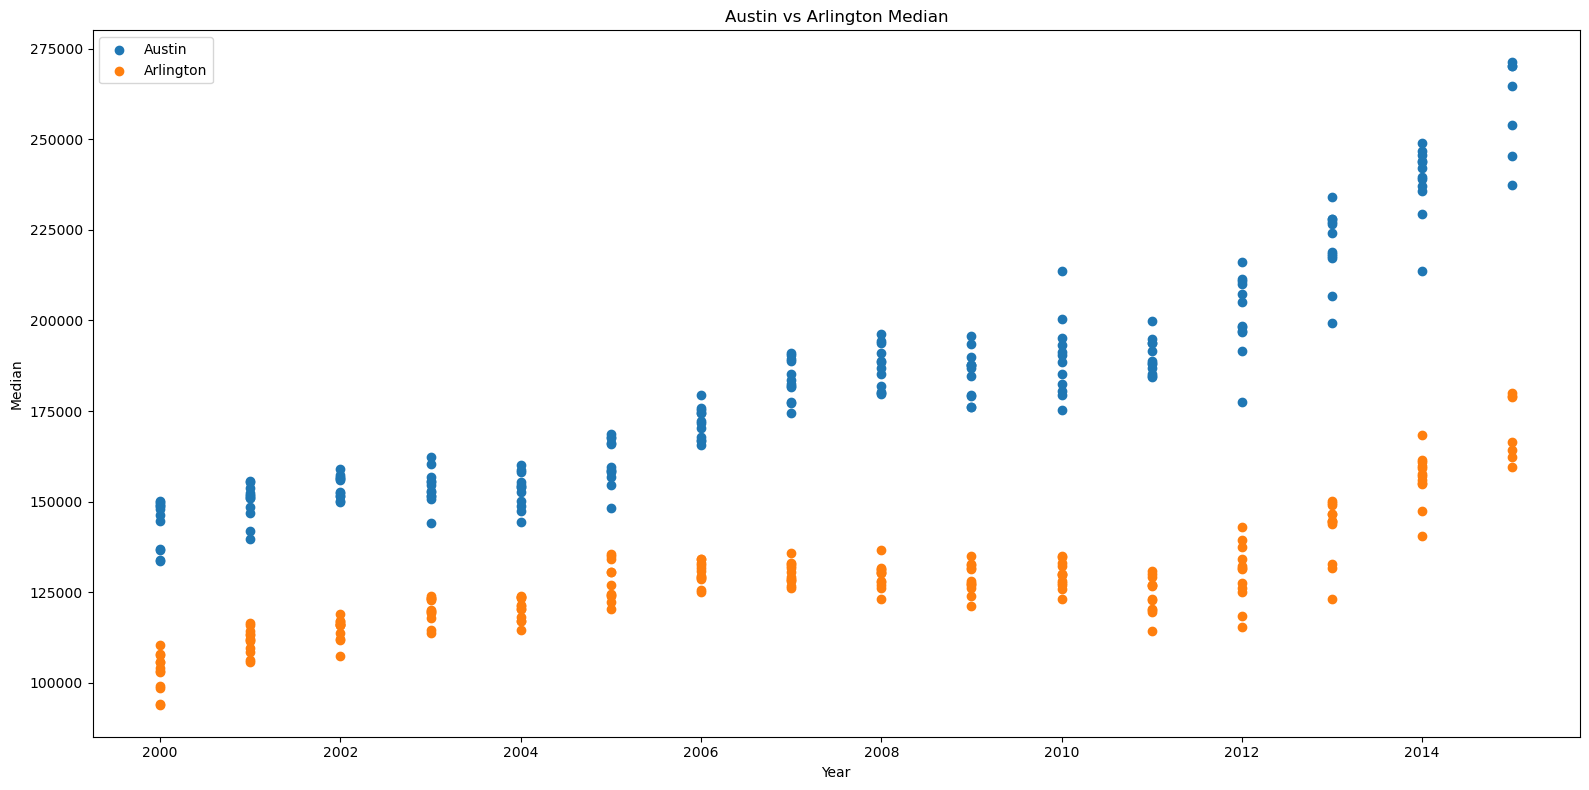

In [1314]:
df_median_city = housing_sales[["year","city","median"]]
df_austin = df_median_city[df_median_city["city"] == "Austin"]
df_arlington = df_median_city[df_median_city["city"] == "Arlington"]

fig1, ax1 = plt.subplots(figsize=(16,8))

ax1.scatter(df_austin["year"],df_austin["median"],label="Austin")
ax1.scatter(df_arlington["year"],df_arlington["median"],label="Arlington")

ax1.set_xlabel("Year")
ax1.set_ylabel("Median")

plt.title("Austin vs Arlington Median")
plt.legend()
plt.tight_layout()
plt.show()

## Question 19
Plot the median house prices against year for the cities "Amarillo" and "Houston" on the same scatter plot. Use distinct colors for the two cities, and include a legend so it is clear which points belong to which city.

Select from the subsequent options the one that best describes the pattern / trend that you can see:

  

Remark 1: Ensure that you had previously removed all rows with missing values before conducting this calculation (one of the initial questions).

Remark 2: You can plot the two cities separately but on the same axes, using different colors for each.
Question 19 Answer
1. The median house prices of "Amarillo" are for each year always above those of "Houston"
2. The median house prices of "Amarillo" are for each year in the vast majority of cases above those of "Houston"
3. The median house prices of "Amarillo" are for each year similar to those of "Houston"
4. **The median house prices of "Houston" are for each year in the vast majority of cases above those of "Amarillo"**
5. The median house prices of "Houston" are for each year always above those of "Amarillo"
6. The median house prices of "Houston" and "Amarillo" are both decreasing over time
7. The median house prices of "Houston" are increasing over time and for "Amarillo" they decreasing over time
8. The median house prices of "Amarillo" are increasing over time and for "Houston" they decreasing over time


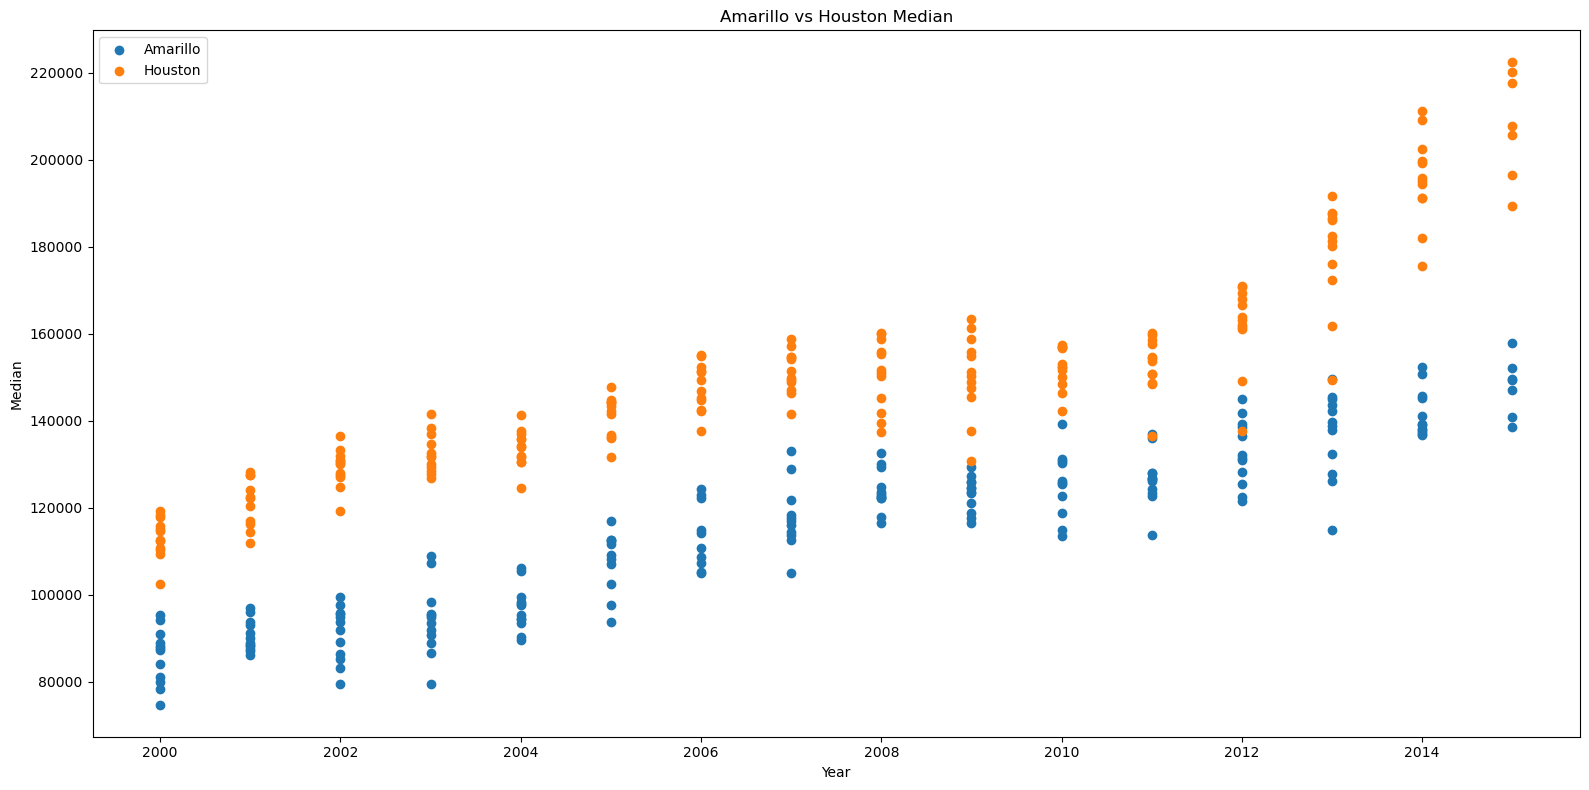

In [1315]:
df_amarillo = df_median_city[df_median_city["city"] == "Amarillo"]
df_houston = df_median_city[df_median_city["city"] == "Houston"]

fig2, ax2 = plt.subplots(figsize=(16,8))

ax2.scatter(df_amarillo["year"],df_amarillo["median"],label="Amarillo")
ax2.scatter(df_houston["year"],df_houston["median"],label="Houston")

ax2.set_xlabel("Year")
ax2.set_ylabel("Median")

plt.title("Amarillo vs Houston Median")
plt.legend()
plt.tight_layout()
plt.show()

## Question 20
Measure the correlation between the five (numerical) variables "sales", "median", "volume", "listings" and "inventory".

              sales    median    volume  listings  inventory
sales      1.000000  0.335074  0.980809  0.921391  -0.192902
median     0.335074  1.000000  0.402110  0.245603  -0.142189
volume     0.980809  0.402110  1.000000  0.860750  -0.194266
listings   0.921391  0.245603  0.860750  1.000000  -0.100200
inventory -0.192902 -0.142189 -0.194266 -0.100200   1.000000


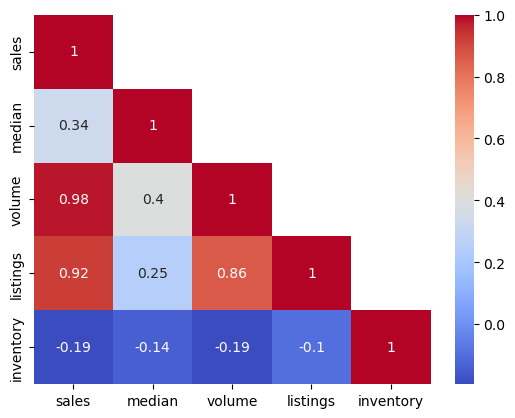

In [1316]:
df_corr = housing_sales[["sales","median","volume","listings","inventory"]]
corr_m = df_corr.corr()

print(corr_m)
upper_tri = np.triu(corr_m,k=1)

fig3, ax3 = plt.subplots()
sns.heatmap(corr_m,annot=True, cmap="coolwarm", mask=upper_tri)
plt.show()

## Question 21
Determine the average median house price and average sales for all records in 2015 for each the city (1) "Dallas" and (2) "Houston".

 

Please select the answer that is the most complete / correct one.

 

Remark: Ensure that you had previously removed all rows with missing values before conducting this calculation (one of the initial questions).

1. The average of the median house prices in Dallas is higher than in Houston, and Dallas has with close to 7000 sales also the higher average sales
2. The average of the median house prices in Houston is higher than in Dallas, and Houston has with close to 7000 sales also the higher average sales
3. The average of the median house prices in Dallas is higher than in Houston, and Dallas has with close to 4400 sales also the higher average sales
4. The average of the median house prices in Houston is higher than in Dallas and Houston has with close to 5200 sales also the higher average sales
5. The average of the median house prices in Dallas is higher than in Houston but Dallas has with close to 7000 sales the lower average sales
6. The average of the median house prices in Houston is higher than in Dallas but Houston has with close to 7000 sales the lower average sales
7. **The average of the median house prices in Dallas is higher than in Houston but Houston has with close to 7000 sales the higher average sales**
8. The average of the median house prices in Dallas is close to 227k and, thus, higher than in Houston but Houston has with close to 5600 sales the higher average sales


In [1317]:
avg_median_sales_by_city_year = housing_sales.groupby(["city","year"])[["median","sales"]].mean().reset_index()

mask4 = (avg_median_sales_by_city_year["year"] == 2015) & ((avg_median_sales_by_city_year["city"] == "Dallas") | (avg_median_sales_by_city_year["city"] == "Houston"))

print(avg_median_sales_by_city_year[mask4])

        city  year         median        sales
183   Dallas  2015  227271.428571  5247.857143
308  Houston  2015  208471.428571  6872.714286


## Question 22
Having answered all previous questions and with all the analysis that you have done (and may do to answer this question), which of the following statements are correct?

1. The sales of houses and the median house prices are not highly correlated (less than 0.5) [So the median house prices are not generally the reason for higher or lower sales]
2. The sales and inventory are highly positively correlated (larger than 0.8) [So higher sales may be driving longer time periods for the inventory to be sold off]
3. median and inventory are close to uncorrelated (not larger 0.2 or smaller -0.2) [So the median house prices seem not to be clearly linked to the number of months it would take to sell the current inventory]
4. Dallas has a higher average for the median house prices than Houston
5. Houston has lower average sales than Dallas

Please select the answer that is the most complete / correct one!

1. True, the correlation is .34 as seen from question 20.
2. False, the correlation is -.19, as seen from question 20.
3. True, the correlation is -.10, as seen from question 20.
4. True, 160798 vs 149941, as seen below.
5. False, 5591 vs 4355, as seen below.

In [1318]:
cities = "Dallas Houston".split()
avg_sales_by_city = housing_sales.groupby(["city"])[["sales"]].mean().reset_index()

for city in cities:
    print(avg_median_by_city[avg_median_by_city["city"] == city])
    print(f"{avg_sales_by_city[avg_median_by_city["city"] == city]}\n")

      city         median
11  Dallas  160798.387097
      city        sales
11  Dallas  4355.462366

       city         median
19  Houston  149941.397849
       city        sales
19  Houston  5591.134409

